In [63]:
%load_ext autoreload
%autoreload 2
import os
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import *
from utils import *
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Download the players' face images:
# download_images()
# remove_error_images()

In [40]:
# Specify a device for training the model:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cpu')
device

device(type='cuda', index=0)

In [28]:
# Prepare dataset and data loader:
images = FaceDataset('images', transform=ToTensor())
image_loader = DataLoader(images, batch_size=32, shuffle=True, num_workers=4)

In [29]:
# Save trained model:
# torch.save(vae.state_dict(), 'vae.pt')

In [ ]:
# Train a new vae:
vae, losses = train_model(image_loader, device, model=None, lr=0.01, \
                         weight_decay=0, step_size=5, gamma=0.1, epochs=30)

In [65]:
# Load a pre-trained model:
model = DVAE().to(device)
model.load_state_dict(torch.load('vae.pt'))
model.eval()

DVAE(
  (encoder): Sequential(
    (0): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(3, 3))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(4, 4))
    (5): ReLU()
    (6): Conv2Linear()
    (7): Linear(in_features=5184, out_features=512, bias=True)
    (8): ReLU()
  )
  (mu): Linear(in_features=512, out_features=20, bias=True)
  (logsigma): Linear(in_features=512, out_features=20, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=5184, bias=True)
    (3): ReLU()
    (4): Linear2Conv()
    (5): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(4, 4))
    (6): ReLU()
    (7): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(3, 3))
    (8): ReLU()
    (9): ConvTranspose2d(16, 4, kernel_size=(3, 3), stride=(1, 1))
    (10): Sigmoid()
  )
)

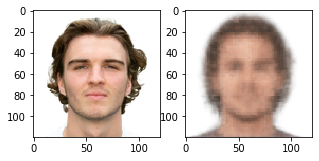

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
# Choose a sample for comparison:
num = 12783
x = images[num][None, :, :].to(device)
# Show the original sample:
ax[0].imshow(images[num].detach().numpy().transpose(1, 2, 0))
# Encode & decode the sample:
recon_x, mu, logsigma, z, eps = model.forward(x)
# Show the decoded sample:
ax[1].imshow(recon_x[0].cpu().detach().numpy().transpose(1, 2, 0))